# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [1]:
import torch
import numpy as np

GROUP_NUMBER = 3


torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):


    X = (torch.rand(n_samples, 2) * 10) - 5


    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)


    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)


    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices]

    return X, y


X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


In [2]:
x_numpy = np.asarray(X_full)
y_numpy = np.asarray(y_full)
x1 = x_numpy[:, 0]
x2 = x_numpy[:, 1]
r = np.sqrt(x1**2 + x2**2)

x_stacked = np.column_stack([x1, x2, r])

In [3]:
indices = torch.randperm(3000)
train_idx, val_idx = indices[:2100], indices[2100:]

x_train, y_train = x_stacked[train_idx], y_full[train_idx]
x_test, y_test = x_stacked[val_idx], y_full[val_idx]

x_train = torch.tensor(x_train, dtype=torch.float32) 
x_test  = torch.tensor(x_test,  dtype=torch.float32)

y_train = y_train.clone().view(-1, 1)
y_test = y_test.clone().view(-1, 1)

In [4]:

W1 = torch.randn(3, 16) * np.sqrt(2/3)
b1 = torch.zeros(1, 16)

W2 = torch.randn(16, 16) * np.sqrt(2/16)
b2 = torch.zeros(1, 16)

W3 = torch.randn(16, 16) * np.sqrt(2/16)
b3 = torch.zeros(1, 16)

W4 = torch.randn(16, 1) * np.sqrt(2/16)
b4 = torch.zeros(1, 1)


params = [W1, b1, W2, b2, W3, b3, W4, b4]
for p in params:
    p.requires_grad = True

In [5]:
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def bce_loss(y_pred, y_true):
    y_pred = torch.clamp(y_pred, 1e-7, 1 - 1e-7)
    return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

In [6]:
import matplotlib.pyplot as plt


learning_rate = 0.1
epochs = 3500
train_losses, val_losses = [], []
train_accs, val_accs = [], []
l2_lambda = 1e-3


for epoch in range(epochs):

    a1 = torch.relu(x_train @ W1 + b1)
    a2 = torch.relu(a1 @ W2 + b2)
    a3 = torch.relu(a2 @ W3 + b3)
    y_pred_train = torch.sigmoid(a3 @ W4 + b4)

  
    l2_penalty = (
        (W1**2).sum() + (b1**2).sum() +
        (W2**2).sum() + (b2**2).sum() +
        (W3**2).sum() + (b3**2).sum() +
        (W4**2).sum() + (b4**2).sum()
    )
    loss = bce_loss(y_pred_train, y_train)+(l2_lambda*l2_penalty)
    train_acc = ((y_pred_train > 0.5).float() == y_train).float().mean()
    train_accs.append(train_acc.item())
    train_losses.append(loss.item())

    loss.backward()
    with torch.no_grad():
        for p in [W1, b1, W2, b2, W3, b3, W4, b4]:
            p -= learning_rate * p.grad
            p.grad.zero_()

    with torch.no_grad():
        va1 = torch.relu(x_test @ W1 + b1)
        va2 = torch.relu(va1 @ W2 + b2)
        va3 = torch.relu(va2 @ W3 + b3)
        y_pred_val = torch.sigmoid(va3 @ W4 + b4)
        val_loss = bce_loss(y_pred_val, y_test)


        val_acc = ((y_pred_val > 0.5).float() == y_test).float().mean()

        val_losses.append(val_loss.item())
        val_accs.append(val_acc.item())



    if epoch % 400 == 0:
        print(f"Epoch {epoch}: Loss {loss.item():.4f} | Val Acc: {val_acc.item():.4f}")

Epoch 0: Loss 2.4420 | Val Acc: 0.5433
Epoch 400: Loss 0.6461 | Val Acc: 0.7667
Epoch 800: Loss 0.4920 | Val Acc: 0.8733
Epoch 1200: Loss 0.4252 | Val Acc: 0.8600
Epoch 1600: Loss 0.3866 | Val Acc: 0.8800
Epoch 2000: Loss 0.3660 | Val Acc: 0.8856
Epoch 2400: Loss 0.3529 | Val Acc: 0.8878
Epoch 2800: Loss 0.3422 | Val Acc: 0.8956
Epoch 3200: Loss 0.3382 | Val Acc: 0.8944


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


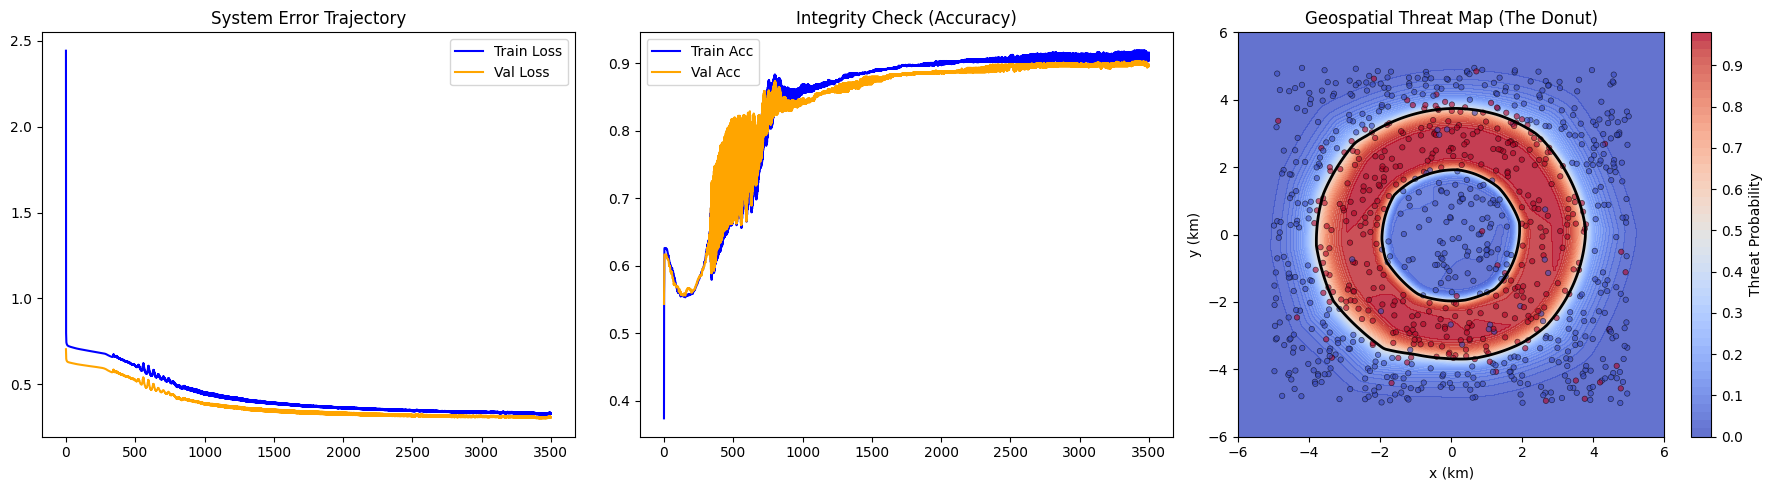

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))


ax[0].plot(train_losses, label='Train Loss', color='blue')
ax[0].plot(val_losses, label='Val Loss', color='orange')
ax[0].set_title("System Error Trajectory")
ax[0].legend()


ax[1].plot(train_accs, label='Train Acc', color='blue')
ax[1].plot(val_accs, label='Val Acc', color='orange')
ax[1].set_title("Integrity Check (Accuracy)")
ax[1].legend()


x_min, x_max = -6, 6
y_min, y_max = -6, 6

xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 200), torch.linspace(y_min, y_max, 200))
grid_points = torch.stack([xx.reshape(-1), yy.reshape(-1)], dim=1)# Panel 3: Geospatial Threat Map (The Donut)
x_min, x_max = -6, 6
y_min, y_max = -6, 6

xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 200), torch.linspace(y_min, y_max, 200))
grid_x = xx.reshape(-1)
grid_y = yy.reshape(-1)
grid_r = torch.sqrt(grid_x**2 + grid_y**2)
grid_points = torch.stack([grid_x, grid_y, grid_r], dim=1)

with torch.no_grad():
    ga1 = torch.relu(grid_points @ W1 + b1)
    ga2 = torch.relu(ga1 @ W2 + b2)
    ga3 = torch.relu(ga2 @ W3 + b3)
    grid_preds = torch.sigmoid(ga3 @ W4 + b4).reshape(xx.shape)


contour_filled = ax[2].contourf(xx, yy, grid_preds, levels=50, cmap='coolwarm', alpha=0.8)


ax[2].contour(xx, yy, grid_preds, levels=[0.5], colors='black', linewidths=2)

ax[2].scatter(x_test[:, 0], x_test[:, 1], c=y_test.squeeze(), 
            cmap='coolwarm', s=15, alpha=0.6, edgecolors='k', linewidths=0.5)

ax[2].set_title("Geospatial Threat Map (The Donut)")
ax[2].set_xlabel("x (km)")
ax[2].set_ylabel("y (km)")


plt.colorbar(contour_filled, ax=ax[2], label="Threat Probability")


plt.tight_layout()
plt.show()